# Data Extraction and Combination

Notebook to perform tasks to extract, simplify, combine, and analyze data from several sources.

## Data Sources

- Land Area figures for New Hampshire: NH GRANIT system; compiled at [NH Office of Strategic Initiatives](https://www.nh.gov/osi/planning/services/gis/maps.htm), May 2021
- New Hampshire Political Boundaries at 1:24,000 Scale: [NH GRANIT system](https://granit.unh.edu/cgi-bin/nhsearch?dset=pb&#47;nh)
- New Hampshire Conservation/Public Lands at 1:24,000 Scale: [NH GRANIT system](https://www.granit.unh.edu/cgi-bin/nhsearch?dset=consnh&#47;nh)
    - [Interactive map](https://data-nhgranit.opendata.arcgis.com/datasets/new-hampshire-conservation-public-lands/explore?location=43.117182%2C-71.544725%2C13.00)

In [1]:
# Package imports
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import geemap

pd.set_option('max_columns', 50)

## Data Imports

In [15]:
# Import land area data
land_area = pd.read_csv('./data/NH-land-area-figures-consolidated.csv',
                        header=3)

In [16]:
land_area.head()

,County,Municipality,Total acres,Total sq. miles,Land acres,Land sq. miles,Water acres,Water sq. miles
0,Belknap,Alton,53230.5,83.17,40636.10,63.49,12594.40,19.68
1,Belknap,Barnstead,28758.7,44.94,27215.21,42.52,1543.49,2.41
2,Belknap,Belmont,20427.6,31.92,19190.38,29.98,1237.22,1.93
3,Belknap,Center Harbor,10394.4,16.24,8498.05,13.28,1896.35,2.96
4,Belknap,Gilford,34243.7,53.51,24786.22,38.73,9457.48,14.78


In [17]:
land_area.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   County           259 non-null    object 
 1   Municipality     259 non-null    object 
 2   Total acres      259 non-null    float64
 3   Total sq. miles  259 non-null    float64
 4   Land acres       259 non-null    float64
 5   Land sq. miles   259 non-null    float64
 6   Water acres      259 non-null    float64
 7   Water sq. miles  259 non-null    float64
dtypes: float64(6), object(2)
memory usage: 16.3+ KB


In [19]:
total_areas = land_area.groupby(['County']).sum()
total_areas

,Total acres,Total sq. miles,Land acres,Land sq. miles,Water acres,Water sq. miles
County,,,,,,
Belknap,300786.19,469.98,256443.63,400.68,44342.57,69.28
Carroll,635817.97,993.47,595805.22,930.95,40012.76,62.52
Cheshire,466514.34,728.94,450805.97,704.39,15708.39,24.54
Coos,1171969.27,1831.21,1148425.31,1794.41,23543.98,36.77
Grafton,1119743.95,1749.59,1093489.36,1708.56,26254.63,41.02
Hillsborough,571152.78,892.46,555882.47,868.58,15270.34,23.85
Merrimack,611148.30,954.92,593770.15,927.73,17378.17,27.12
Rockingham,465182.48,726.86,445326.83,695.83,19855.68,31.01
Strafford,244860.75,382.60,233827.90,365.36,11032.86,17.23


In [20]:
# Import political boundaries (pb) data
pba_path = '../../NH_PoliticalBoundaries/GRANIT_20220220160347/pba.shp'  # Lines
pbp_path = '../../NH_PoliticalBoundaries/GRANIT_20220220160347/pbp.shp'  # Polygons

In [21]:
pb_lines = gpd.read_file(pba_path, driver='shapefile')

In [22]:
pb_lines.head()

,FNODE_,TNODE_,LPOLY_,RPOLY_,LENGTH,PB_,PB_ID,TYPE,geometry
0,3,1,1,2,74843.38,1,1,1,"LINESTRING (1063158.250 1002584.875, 1063233.0..."
1,1,2,1,2,83566.10,2,2,1,"LINESTRING (1102437.750 1003597.625, 1102581.7..."
2,4,3,1,2,33244.42,3,3,1,"LINESTRING (1043039.000 996290.125, 1043019.12..."
3,5,4,1,2,46482.84,4,4,1,"LINESTRING (1045191.375 966039.625, 1045218.87..."
4,6,5,1,2,57585.89,5,5,1,"LINESTRING (1027435.875 932679.000, 1027442.00..."


In [33]:
pb_lines.shape

(773, 9)

<AxesSubplot:>

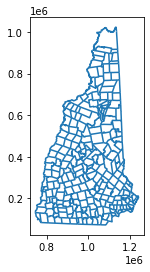

In [35]:
pb_lines.plot()

In [23]:
pb_poly = gpd.read_file(pbp_path, driver='shapefile')

In [24]:
pb_poly.head()

,FIPS,NAME,RPA,ACRES,COUNTY,geometry
0,7160,Pittsburg,1,186430.5,7,"POLYGON ((1063158.250 1002584.875, 1063233.000..."
1,7040,Clarksville,1,39915.8,7,"POLYGON ((1059756.000 928359.250, 1059898.250 ..."
2,7005,Atkinson & Gilmanton,1,12351.3,7,"POLYGON ((1111451.250 916720.625, 1111518.250 ..."
3,7190,Stewartstown,1,30019.1,7,"POLYGON ((1019728.688 911317.500, 1019769.188 ..."
4,7175,Second College,1,26773.9,7,"POLYGON ((1117369.750 895118.500, 1117506.500 ..."


In [34]:
pb_poly.shape

(259, 6)

In [25]:
pb_poly.crs

<Derived Projected CRS: PROJCS["NAD83 / New Hampshire (ftUS)",GEOGCS["NAD8 ...>
Name: NAD83 / New Hampshire (ftUS)
Axis Info [cartesian]:
- [east]: Easting (US survey foot)
- [north]: Northing (US survey foot)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

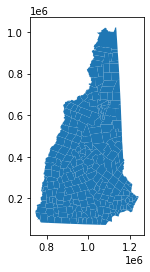

In [36]:
pb_poly.plot()

In [32]:
# Data check: Pittsburg area in sq ft and acres
p_name = pb_poly.loc[0, 'NAME']
pitts_sqft = pb_poly.loc[0, 'geometry'].area
conv_factor = 43560
print(f'{p_name} sq ft: {pitts_sqft}')
print(f'{p_name} acres: {pitts_sqft/conv_factor}')

Pittsburg sq ft: 8120912285.074219
Pittsburg acres: 186430.4932294357


In [37]:
# Import public and conservation land (pcl) data
pcl_path = '../../NH_PublicConservationLand/GRANIT_20220220154602/consnh.shp'

In [38]:
public = gpd.read_file(pcl_path, driver='shapefile')

In [44]:
public.head()

,SHAPE_Leng,SHAPE_Area,TID,NAME,NAMEALT,P_NAME,P_NAMEALT,PPTYPE,PPTERMTYPE,PPTERM,SPTYPE1,SPTYPE2,PPAGENCY,PPAGENTYPE,SPAGENCY1,SPAGENCY2,RSIZE,CSIZE,P_RSIZE,P_CSIZE,PROGRAM,LEVEL_,MSTATUS,SOURCE,ACCURACY,COBKPG,DATEREC1,DATEREC2,ACCESS,DATEADDED,DATEALTER,NOTES1,NOTES2,NOTES3,NOTES4,PID,GAP_STATUS,OWNERTYPE,geometry
0,83426.545022,2.163150e+08,006-004 -002,Connecticut Lakes WMA North (West),None,Connecticut Lakes Natural Area,Connecticut Lakes Headwaters,FO,P,-98,CE,CE,32000,3,52010,31000,-999.0,4965.930,25000.0,25001.000,7,1,3,NH DRED/SURVEY,1,07/1018/197,20021230,None,1,20050117,20170418,"Other Programs: LCHIP, N.A. Wetlands Conservat...",BOUNDARY ADJUSTED TO MEET 2009 DRED SURVEY CT ...,Boundary updated to match 006-001 -001,None,006-004 -,3,3,"POLYGON ((1099405.625 1002946.688, 1099033.625..."
1,61619.397201,4.721541e+07,006-004 -003,Connecticut Lakes WMA North (East),None,Connecticut Lakes Natural Area,Connecticut Lakes Headwaters,FO,P,-98,CE,CE,32000,3,52010,31000,-999.0,1083.920,25000.0,25001.000,7,1,3,NH DRED/SURVEY,1,07/1018/197,20021230,None,1,20050117,20170418,"Other Programs: LCHIP, N.A. Wetlands Conservat...",BOUNDARY ADJUSTED TO MEET 2009 DRED SURVEY CT ...,Boundary updated to match 006-001 -001,None,006-004 -,3,3,"POLYGON ((1108214.134 1000715.787, 1108214.125..."
2,22319.159084,4.695122e+06,006-001 -004,Connecticut Lakes State Forest,None,Connecticut Lakes State Forest,None,FO,U,-99,None,None,31000,3,0,0,-999.0,107.786,1531.0,1530.510,0,1,2,USGS,2,07/284/376,19351104,None,1,None,20170418,NH DRED,BOUNDARIES UPDATED WITH DATA SENT FROM NH F&G ...,Boundary and attributes updated by NH DRED,None,006-001 -,2,3,"POLYGON ((1102884.216 960520.713, 1102849.300 ..."
3,7552.234495,3.371443e+06,006-002 -001,Fourth Connecticut Lake Preserve,None,Fourth Connecticut Lake Preserve,None,FO,U,-99,None,None,52010,5,0,0,78.1,77.398,78.1,77.398,0,1,1,SURVEY,2,None,1990,None,1,None,20050117,BOUNDARIES UPDATED WITH DATA SENT FROM NH F&G,None,None,None,006-002 -,1,5,"POLYGON ((1101565.750 1002827.688, 1100987.125..."
4,31544.856081,1.836509e+07,006-003 -001,Norton Pool Preserve,None,Norton Pool Preserve,None,FO,U,-99,None,None,52010,5,0,0,-999.0,421.606,427.1,422.936,0,1,1,SURVEY,1,None,1986,None,1,None,None,1 OF 2 TRACTS,None,None,None,006-003 -,1,5,"POLYGON ((1126678.250 982401.250, 1126702.250 ..."


In [45]:
public.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 12591 entries, 0 to 12590
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   SHAPE_Leng  12591 non-null  float64 
 1   SHAPE_Area  12591 non-null  float64 
 2   TID         12591 non-null  object  
 3   NAME        12591 non-null  object  
 4   NAMEALT     1110 non-null   object  
 5   P_NAME      12591 non-null  object  
 6   P_NAMEALT   336 non-null    object  
 7   PPTYPE      12591 non-null  object  
 8   PPTERMTYPE  12591 non-null  object  
 9   PPTERM      12591 non-null  int64   
 10  SPTYPE1     2460 non-null   object  
 11  SPTYPE2     290 non-null    object  
 12  PPAGENCY    12591 non-null  int64   
 13  PPAGENTYPE  12591 non-null  int64   
 14  SPAGENCY1   12591 non-null  int64   
 15  SPAGENCY2   12591 non-null  int64   
 16  RSIZE       12591 non-null  float64 
 17  CSIZE       12591 non-null  float64 
 18  P_RSIZE     12591 non-null  float64 
 

In [59]:
public.crs

<Derived Projected CRS: PROJCS["NAD83 / New Hampshire (ftUS)",GEOGCS["NAD8 ...>
Name: NAD83 / New Hampshire (ftUS)
Axis Info [cartesian]:
- [east]: Easting (US survey foot)
- [north]: Northing (US survey foot)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [47]:
# Counts by property type
public['PPTYPE'].value_counts()

FO    6506
CE    4936
SA     522
DR     234
FE     200
AR      73
SE      38
RW      29
PE      29
LE      12
HP       9
RV       3
Name: PPTYPE, dtype: int64

In [51]:
# Counts by primary protecting agency
"""
1 Municipal/County
2 Federal
3 State
4 Other Public/Quasi-Public Entity
5 Private
"""

public['PPAGENTYPE'].value_counts()

1    5612
5    4504
3    1461
2     767
4     247
Name: PPAGENTYPE, dtype: int64

In [48]:
# Counts by owner type
"""
1 Municipal
2 Federal
3 State
4 Other Public/Quasi-Public Entity
5 Private
6 County
9 Uknown
"""
public.groupby('OWNERTYPE').size()

OWNERTYPE
1    4135
2     413
3    1019
4     290
5    6660
6      47
9      27
dtype: int64

In [72]:
selt = public[public['PPAGENCY'] == 51960]
selt.tail(10)

,SHAPE_Leng,SHAPE_Area,TID,NAME,NAMEALT,P_NAME,P_NAMEALT,PPTYPE,PPTERMTYPE,PPTERM,SPTYPE1,SPTYPE2,PPAGENCY,PPAGENTYPE,SPAGENCY1,SPAGENCY2,RSIZE,CSIZE,P_RSIZE,P_CSIZE,PROGRAM,LEVEL_,MSTATUS,SOURCE,ACCURACY,COBKPG,DATEREC1,DATEREC2,ACCESS,DATEADDED,DATEALTER,NOTES1,NOTES2,NOTES3,NOTES4,PID,GAP_STATUS,OWNERTYPE,geometry
12578,9070.755872,2.173732e+06,185-163 -001,"Kaczmarek, E",None,"Kaczmarek, E",None,CE,P,-98,None,None,51960,5,0,0,49.9,49.90220,49.9,49.9022,0,1,4,SURVEY,1,15/5885/2660,20180110,None,3,20210630,None,None,None,None,None,185-163 -,4,5,"POLYGON ((1176538.785 162993.248, 1177010.035 ..."
12579,6101.768400,1.750995e+06,154-094 -001,Langley & Kennard Forest,None,Langley & Kennard Forest,None,FO,P,-98,CE,None,51960,5,22100,0,40.2,40.19750,40.2,40.1975,0,1,2,SURVEY,1,17/4571/310,20180529,None,1,20210630,None,PROGRAM: WRE,None,None,None,154-094 -,2,5,"POLYGON ((1158666.065 235092.653, 1158581.732 ..."
12580,8340.898027,3.257881e+06,168-043 -003,Candace Thayer,None,Lamprey River Wildlife Preserve,None,FO,P,-98,None,None,51960,5,0,0,75.0,74.79100,160.4,158.5890,0,1,2,SURVEY,1,15/6010/76 + 15/6010/79,20190620,None,1,20210630,None,None,None,None,None,168-043 -,2,5,"POLYGON ((1156678.095 204553.994, 1156681.132 ..."
12581,8404.754624,2.459180e+06,168-043 -002,Limperis,None,Lamprey River Wildlife Preserve,None,FO,P,-98,CE,EI,51960,5,22100,52800,58.1,56.45520,160.4,158.5890,10,1,1,SURVEY,1,15/5657/2871,20150929,None,1,None,20210630,None,PROGRAM:WRE,Candace Thayer added to the total parcel size,None,168-043 -,1,5,"POLYGON ((1154863.831 203934.892, 1154851.060 ..."
12582,6290.624674,1.191061e+06,168-043 -001,Suke,None,Lamprey River Wildlife Preserve,None,FO,P,-98,None,None,51960,5,0,0,27.3,27.34310,160.4,158.5890,99,1,2,SURVEY,1,15/4154/0463,20030919,None,1,20040120,20210630,PROGRAM: LAMPREY RIVER ADVISORY COMMITTEE,None,Candace Thayer added to the total parcel size,None,168-043 -,2,5,"POLYGON ((1155420.908 202203.907, 1155402.603 ..."
12583,5379.686554,1.455561e+06,168-128 -001,Mullen,None,Mullen,None,FO,P,-98,CE,None,51960,5,22100,0,33.4,33.41520,33.4,33.4152,0,1,2,SURVEY,1,15/6029/213 + 15/6029/20,20190823,None,1,20210630,None,None,None,None,None,168-128 -,2,5,"POLYGON ((1131175.674 184065.297, 1132215.111 ..."
12584,2032.739201,2.401403e+05,127-072 -001,Panish #2,FRPP,Panish #2,FRPP,CE,P,-98,EI,EI,51960,5,22100,40350,-999.0,5.51289,16.0,15.9537,0,1,4,SURVEY,1,17/3539/0337,20070614,None,3,20210630,None,None,None,None,None,127-072 -,4,5,"POLYGON ((1156148.549 344111.880, 1156026.030 ..."
12585,2695.447495,4.547987e+05,127-072 -002,Panish #2,FRPP,Panish #2,FRPP,CE,P,-98,EI,EI,51960,5,22100,40350,-999.0,10.44080,16.0,15.9537,0,1,4,SURVEY,1,17/3539/0337,20070614,None,3,20210630,None,None,None,None,None,127-072 -,4,5,"POLYGON ((1157340.852 344455.135, 1156938.664 ..."
12586,3298.117398,5.240291e+05,168-129 -001,Reinhold-Johnson,None,Reinhold-Johnson,None,FO,P,-98,None,None,51960,5,0,0,12.0,12.03010,12.0,12.0301,0,1,2,SURVEY,1,15/5968/1243,20181214,None,1,20210630,None,None,None,None,None,168-129 -,2,5,"POLYGON ((1153004.213 210804.186, 1153128.104 ..."
12587,3669.699044,7.235679e+05,141-012 -001,"Rochester #2, CIty of",Copper Lane,"Rochester #2, CIty of",Copper Lane,CE,P,-98,None,None,51960,5,0,0,16.6,16.61090,16.6,16.6109,0,1,2,SURVEY,1,17/4135/0784,20130610,None,1,19980804,20210630,"Was town land in GRANIT, now SELT holds CE.",None,None,None,141-012 -,2,1,"POLYGON ((1180740.348 302823.621, 1180873.284 ..."


<AxesSubplot:>

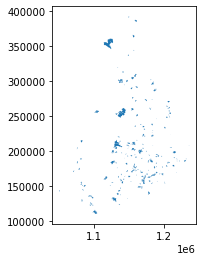

In [73]:
selt.plot()

In [78]:
# Create geojson for map
selt_geojson = selt.to_crs('epsg:4326').__geo_interface__

In [79]:
# Create a basemap
m_selt = geemap.Map(center=[43.78699687528447, -71.51658744025995],
                    zoom=8,
                    ee_initialize=False)

# Polygon style
style = {
    "stroke": True,
    "color": "#000000",
    "weight": 2,
    "opacity": 1,
    "fill": True,
    "fillColor": "#0000ff",
    "fillOpacity": 0.4,
}

m_selt

Map(center=[43.78699687528447, -71.51658744025995], controls=(WidgetControl(options=['position', 'transparent_…

In [80]:
m_selt.add_geojson(selt_geojson, layer_name="Southeast Land Trust")